In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dataset = pd.read_csv('F:\EW_DATSET\\abalone.csv')
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# statistical describtion

In [159]:
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [160]:
dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [161]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(4177, 9)

# univariate analysis

<AxesSubplot:ylabel='Frequency'>

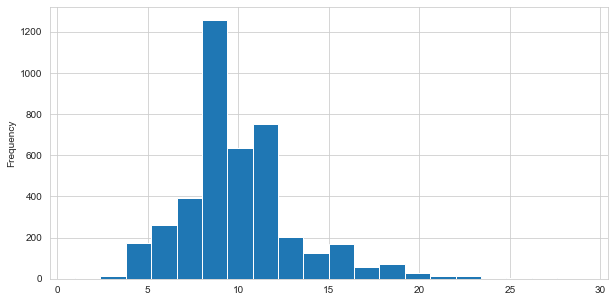

In [162]:
dataset['Rings'].plot.hist(bins=20,figsize=(10,5))
                           




<AxesSubplot:ylabel='Density'>

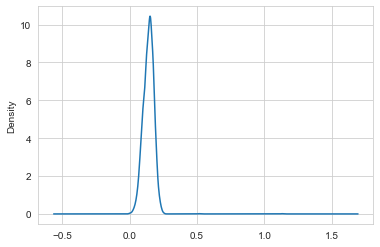

In [163]:
dataset['Height'].plot(kind ='density')

<AxesSubplot:ylabel='Frequency'>

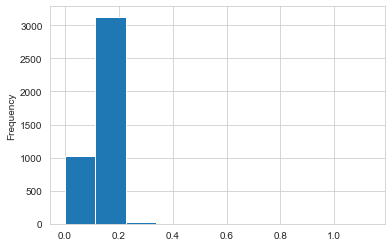

In [164]:
dataset['Height'].plot.hist()

# bivariate analysis

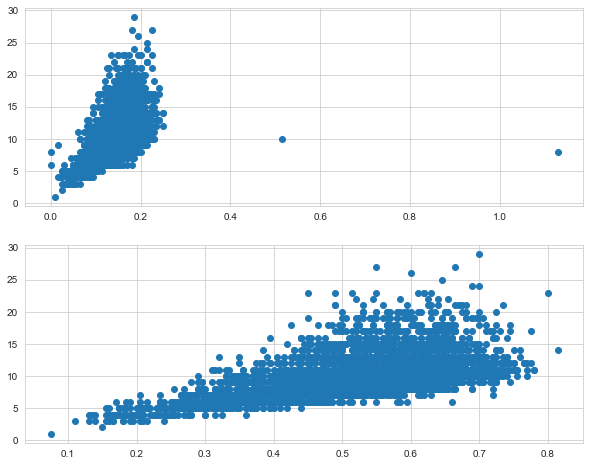

In [165]:
figure,axis=plt.subplots(2,1,figsize=(10,8))
axis[0].scatter(dataset.Height, dataset.Rings)
axis[1].scatter(dataset.Length,dataset.Rings)

In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


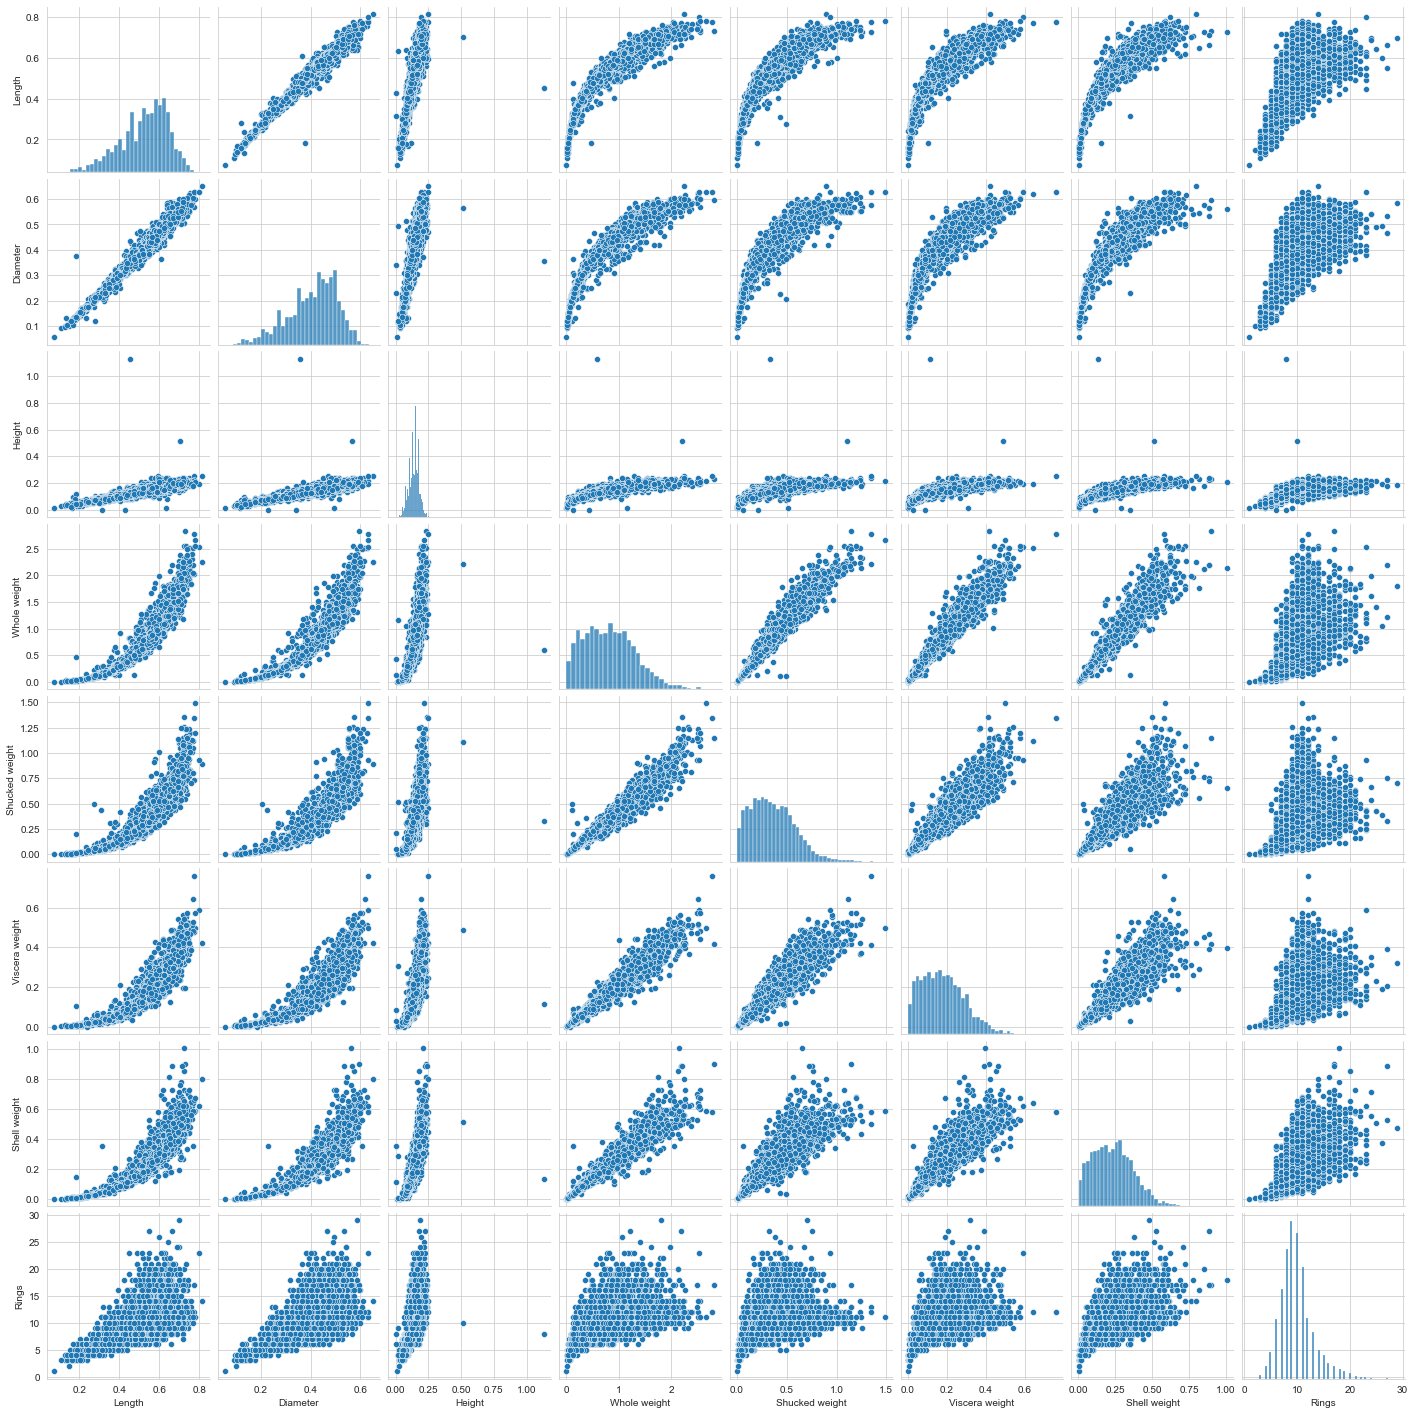

In [167]:
sns.set_style("whitegrid")
sns.pairplot(dataset)
plt.show()

<AxesSubplot:xlabel='Sex'>

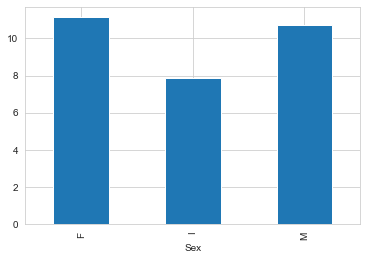

In [168]:
dataset.groupby('Sex')['Rings'].mean().plot.bar()

# Multivariate analysis

<AxesSubplot:>

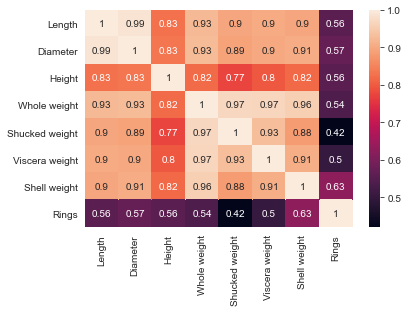

In [169]:
sns.heatmap(dataset.corr(),annot = True)

# removing outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x190cc06d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x190cc0321f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x190cc06d610>],
 'medians': [<matplotlib.lines.Line2D at 0x190cc032880>],
 'fliers': [<matplotlib.lines.Line2D at 0x190cc032bb0>],
 'means': []}

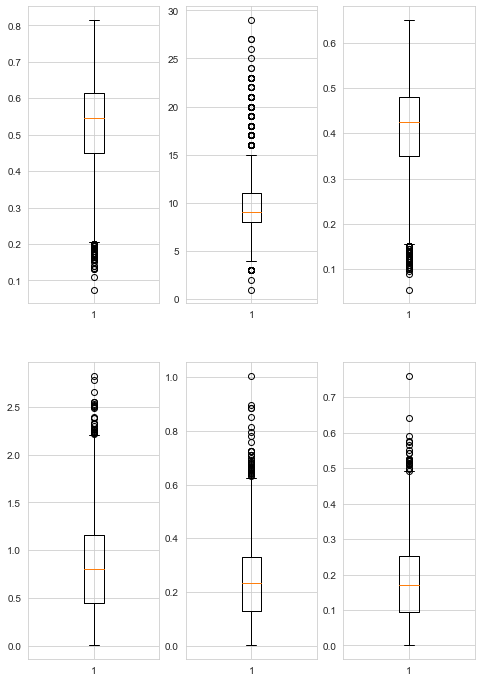

In [170]:

fig,a = plt.subplots(2,3,figsize=(8,12))
a[0,0].boxplot(x='Length',data=dataset)
a[0,1].boxplot(x='Rings',data=dataset)
a[0,2].boxplot(x='Diameter',data=dataset)
a[1,0].boxplot(x='Whole weight',data=dataset)
a[1,1].boxplot(x='Shell weight',data=dataset)
a[1,2].boxplot(x='Viscera weight',data=dataset)

In [171]:
def outlier(df,ft):
    q1,q3=df[ft].quantile(0.25),df[ft].quantile(0.75)
    IQR = q3 - q1
    lower,upper=q1-1.5*IQR,q3+1.5*IQR
    print(lower,upper)
    df=  dataset[(df[ft]<lower)|(df[ft]>upper)]
    return df

In [172]:
li = ['Length','Rings','Diameter','Whole weight','Shell weight','Viscera weight']
for i in li:
   df = outlier(dataset,i)

0.20250000000000004 0.8624999999999999
3.5 15.5
0.15499999999999997 0.675
-0.62575 2.22025
-0.16849999999999998 0.6275
-0.14575000000000002 0.49225


{'whiskers': [<matplotlib.lines.Line2D at 0x190cc3ce730>,
 'caps': [<matplotlib.lines.Line2D at 0x190cc3cedf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x190cc3ce3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x190cc3ec4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x190cc3ec820>],
 'means': []}

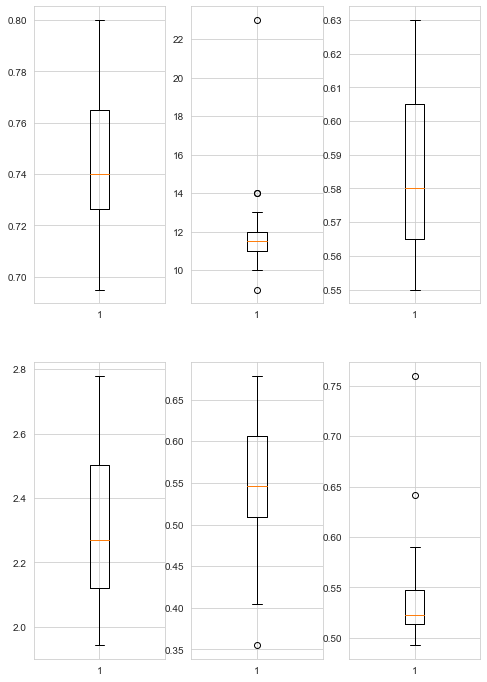

In [173]:
fig,a = plt.subplots(2,3,figsize=(8,12))
a[0,0].boxplot(x='Length',data=df)
a[0,1].boxplot(x='Rings',data=df)
a[0,2].boxplot(x='Diameter',data=df)
a[1,0].boxplot(x='Whole weight',data=df)
a[1,1].boxplot(x='Shell weight',data=df)
a[1,2].boxplot(x='Viscera weight',data=df)

# one hot encoding

In [174]:
df_n = pd.get_dummies(dataset)
df_n.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# splitting data into train and test

In [175]:
y=df_n['Rings'].values.reshape(-1,1)
X=df_n.drop(['Rings'],axis=1)

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [195]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# building a model

In [196]:
from sklearn import linear_model 
linear_reg=linear_model.LinearRegression()
reg1=linear_reg.fit(X_train,y_train)

# training and testing the model

In [197]:
y_pred=reg1.predict(X_test)

In [198]:
print(reg1.intercept_)
print(reg1.coef_)

[9.91753126]
[[-0.08240147  1.13308991  0.44940139  4.26230706 -4.36321189 -1.04098661
   1.23504784  0.1208763  -0.2585514   0.13492849]]


# performing metrics

In [199]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.5502434915350585


In [200]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 4.453888012565059


In [201]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.5448543944955551


In [193]:
linear_reg.score(X_test,y_test)*100

53.631719757489705